In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from detection_util import create_train_val_set
from detection_util import create_test_set_from_json
import json
from collections import defaultdict

###  **The IoU overlap** threshold for pedestrian, cyclist, tricycle is set to 0.5 and for car, truck, tram is set to 0.7.


In [504]:
root = "../data/SSLAD-2D/labeled/"
train_sets, val_sets = create_train_val_set(root, avalanche=False)
real_test_datasets, _ = create_test_set_from_json(root,avalanche=False)

categories = {
    1: "Pedestrain",
    2: "Cyclist",
    3: "Car",
    4: "Truck",
    5: "Tram (Bus)",
    6: "Tricycle"
}

colors = ["white","b","g","yellow","cyan","purple","orange" ] # color for class 0 to 6


In [515]:
def visualize_image(idx, dataset, ax):
    img, target = dataset[idx]
    img = img.detach().numpy()
    img = np.moveaxis(img, 0, 2)
    ax.imshow(img)
    ax.axis('off')

    for bbox in target['boxes']:
        ax.add_patch(Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1],
                               fill=False, lw=2, edgecolor='r'))

In [14]:
a = [len(train_sets[i]) for i in range(4) ]
b = [len(val_sets[i]) for i in range(4) ]
print (a,b,"train:",sum(a),"val:",sum(b),"total:",sum(a)+sum(b))

[4470, 1329, 1479, 524] [497, 148, 165, 59] train: 7802 val: 869 total: 8671


In [158]:
vs = val_sets[0]
print("ids",vs.samples)


ids [4501, 4502, 4503, 4504, 4505, 4506, 4507, 4508, 4509, 4510, 4511, 4512, 4513, 4514, 4515, 4516, 4517, 4518, 4519, 4520, 4521, 4522, 4523, 4524, 4525, 4526, 4527, 4528, 4529, 4530, 4531, 4532, 4533, 4534, 4535, 4536, 4537, 4538, 4539, 4540, 4541, 4542, 4544, 4545, 4546, 4547, 4548, 4549, 4550, 4551, 4552, 4553, 4554, 4555, 4556, 4557, 4558, 4559, 4560, 4561, 4562, 4563, 4564, 4565, 4566, 4567, 4568, 4569, 4570, 4571, 4572, 4573, 4574, 4575, 4576, 4577, 4578, 4579, 4580, 4581, 4582, 4583, 4584, 4585, 4586, 4587, 4588, 4589, 4590, 4591, 4592, 4593, 4594, 4595, 4596, 4597, 4598, 4599, 4600, 4601, 4602, 4603, 4604, 4605, 4606, 4607, 4608, 4609, 4610, 4611, 4612, 4613, 4614, 4615, 4616, 4617, 4618, 4619, 4620, 4621, 4622, 4623, 4624, 4625, 4626, 4627, 4628, 4629, 4630, 4631, 4632, 4633, 4634, 4635, 4636, 4637, 4638, 4639, 4640, 4641, 4642, 4643, 4644, 4645, 4646, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663, 4664, 4665, 4666, 4667, 4668,

In [182]:
from tqdm import tqdm
label_stats = defaultdict(int)
aspect_stats = defaultdict(list)
width_stats  =defaultdict(list)
height_stats = defaultdict(list)
for ts in train_sets:
    L = len(ts)
    for i in tqdm(range(L)):
        target = ts._load_target(i)
        for idx, b in enumerate(target['labels'].tolist()):
            label_stats[b] +=1
            x, y, w, h = target['boxes'][idx].tolist()
            ratio = w / h
            aspect_stats[b].append(ratio)
            width_stats[b].append(w)
            height_stats[b].append(h)
                   

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 524/524 [00:01<00:00, 294.26it/s]


In [169]:
for k in label_stats:
    print(categories[k] , label_stats[k])

Car 34433
Cyclist 6689
Truck 11286
Tram (Bus) 2319
Pedestrain 5139
Tricycle 212


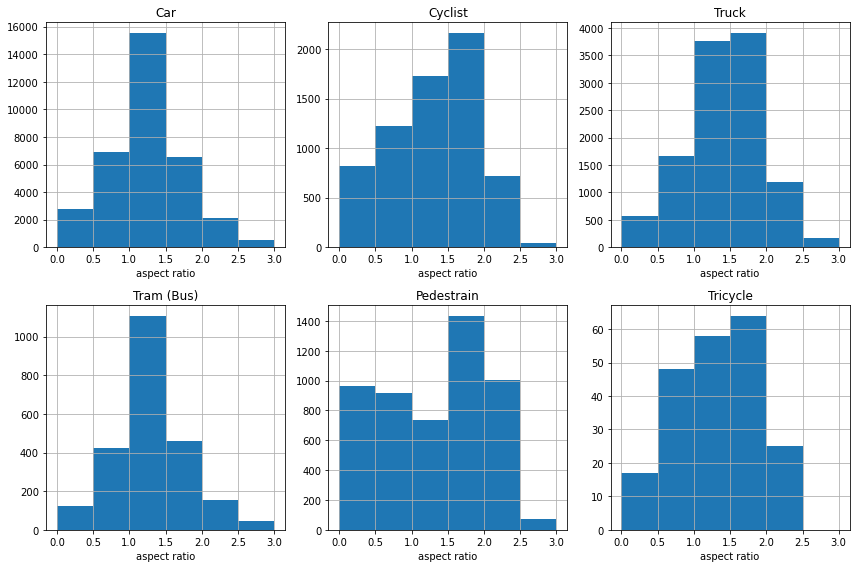

In [183]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for idx, ax in zip(aspect_stats.keys(), axes.flatten()):
    ax.hist(aspect_stats[idx],bins=[0,0.5,1,1.5,2,2.5,3])
    ax.grid(True)
    ax.set_xlabel("aspect ratio")
    ax.set_title(categories[idx])
plt.tight_layout()
plt.show()

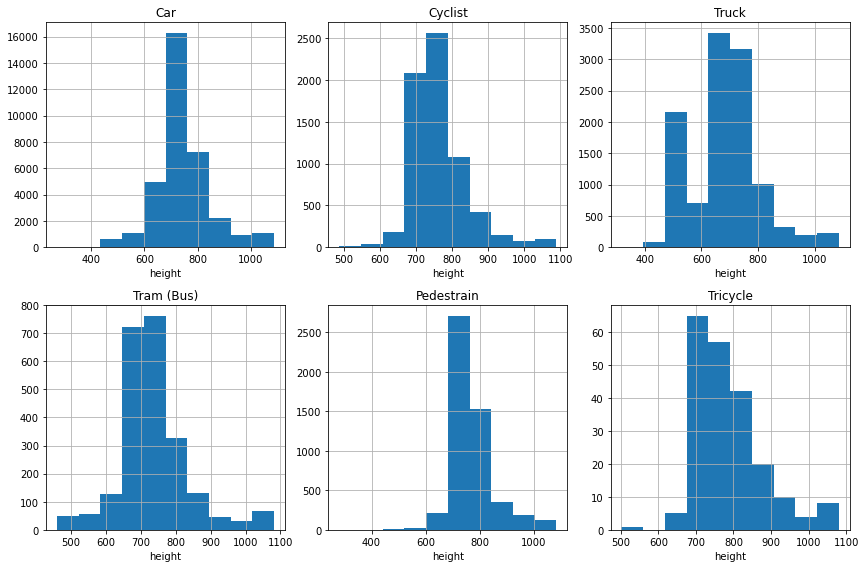

In [187]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for idx, ax in zip(aspect_stats.keys(), axes.flatten()):
    ax.hist(height_stats[idx],bins=10)
    ax.grid(True)
    ax.set_xlabel("height")
    ax.set_title(categories[idx])
plt.tight_layout()
plt.show()

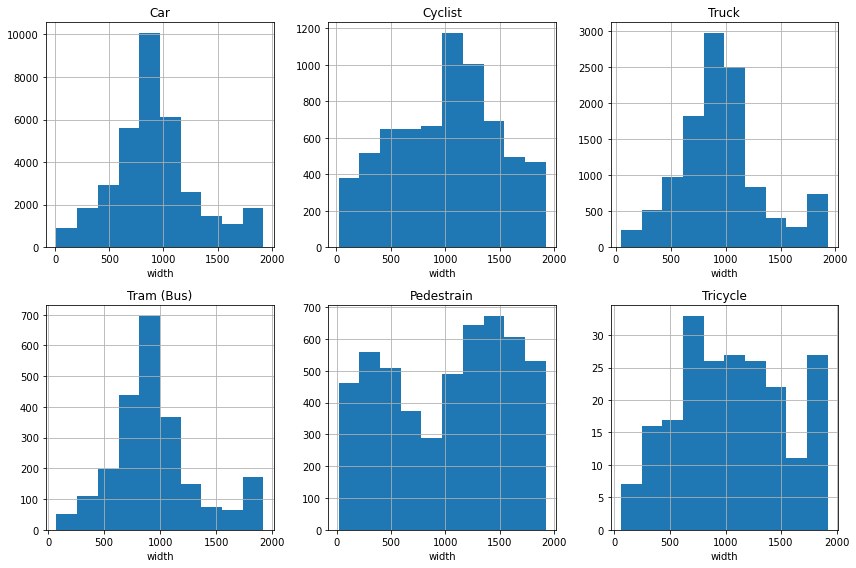

In [188]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for idx, ax in zip(aspect_stats.keys(), axes.flatten()):
    ax.hist(width_stats[idx],bins=10)
    ax.grid(True)
    ax.set_xlabel("width")
    ax.set_title(categories[idx])
plt.tight_layout()
plt.show()

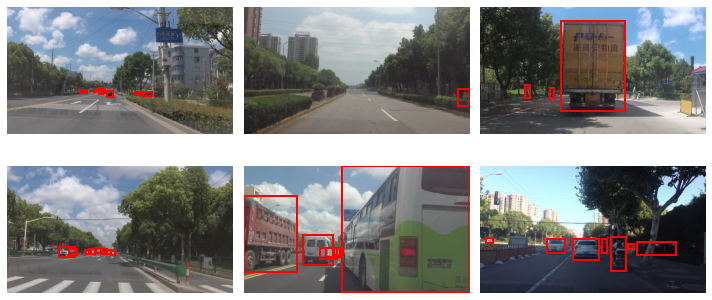

In [287]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
N = len(axes.flatten())
dataset = train_sets[0]
idxs = np.random.randint(0, len(dataset), N)
for idx, ax in zip(idxs, axes.flatten()):
    visualize_image(idx, dataset, ax)
plt.tight_layout()
plt.show()

In [288]:
def read_json(file):
    with open(file) as f:
        return json.load(f)

## boxes are in x, y, w,h from fast RCNN

In [289]:
val[0]

{'image_id': 4501,
 'category_id': 3,
 'bbox': [609.416748046875,
  660.4736938476562,
  37.83544921875,
  31.775634765625],
 'score': 0.9998339414596558}

In [290]:
!ls aa/
val = []
val.extend(read_json("aa/result_val_0.json"))
val.extend(read_json("aa/result_val_1.json"))
val.extend(read_json("aa/result_val_2.json"))
val.extend(read_json("aa/result_val_3.json"))


result_val_0.json  result_val_2.json  val_2021-10-01_13-02-31.zip
result_val_1.json  result_val_3.json


In [291]:
val_dict = defaultdict(list)
for v in val:
    val_dict[v['image_id']].append(v)
    
print (len(val_dict))

524


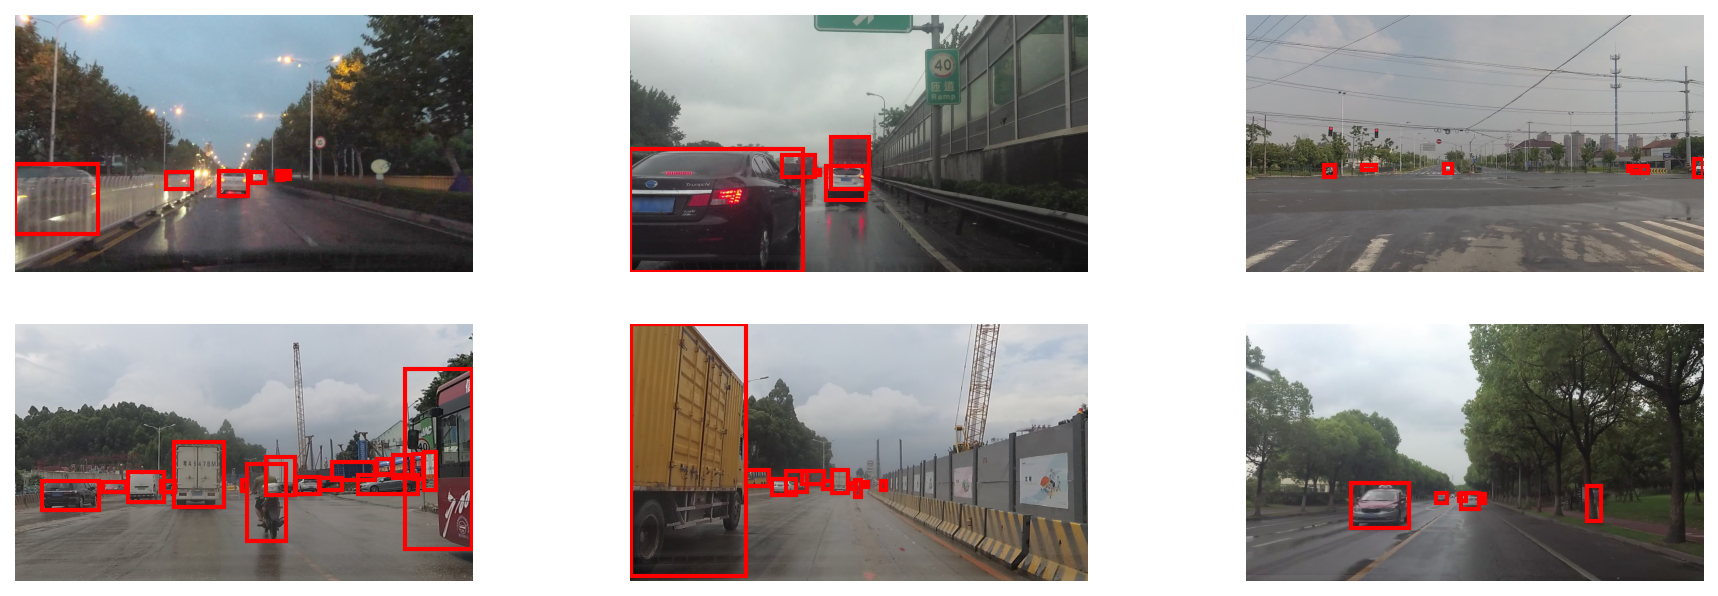

In [507]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5),dpi=150)
dataset_val = val_sets[3]
idxs = np.random.randint(0, len(dataset_val), 6)
for idx, ax in zip(idxs, axes.flatten()):
    visualize_image(idx, dataset_val, ax)
plt.show()

4912 total preds 28
label:2,Cyclist,confidence: 1.00
label:2,Cyclist,confidence: 0.99
label:1,Pedestrain,confidence: 0.99
label:2,Cyclist,confidence: 0.97
label:2,Cyclist,confidence: 0.94
label:1,Pedestrain,confidence: 0.49
label:1,Pedestrain,confidence: 0.47
label:3,Car,confidence: 1.00
label:3,Car,confidence: 1.00
label:3,Car,confidence: 1.00
label:3,Car,confidence: 0.97
label:2,Cyclist,confidence: 0.96
label:2,Cyclist,confidence: 0.57
label:1,Pedestrain,confidence: 0.47
4670 total preds 31
label:1,Pedestrain,confidence: 0.99
label:3,Car,confidence: 0.99
label:3,Car,confidence: 0.92
label:3,Car,confidence: 0.86
label:3,Car,confidence: 0.85
label:3,Car,confidence: 0.81
label:1,Pedestrain,confidence: 0.68
label:3,Car,confidence: 0.62
label:4,Truck,confidence: 0.58
label:3,Car,confidence: 0.58
label:1,Pedestrain,confidence: 0.48
label:3,Car,confidence: 0.44
label:3,Car,confidence: 0.40
label:3,Car,confidence: 0.40
label:4,Truck,confidence: 0.37
label:3,Car,confidence: 1.00
label:4,Truck

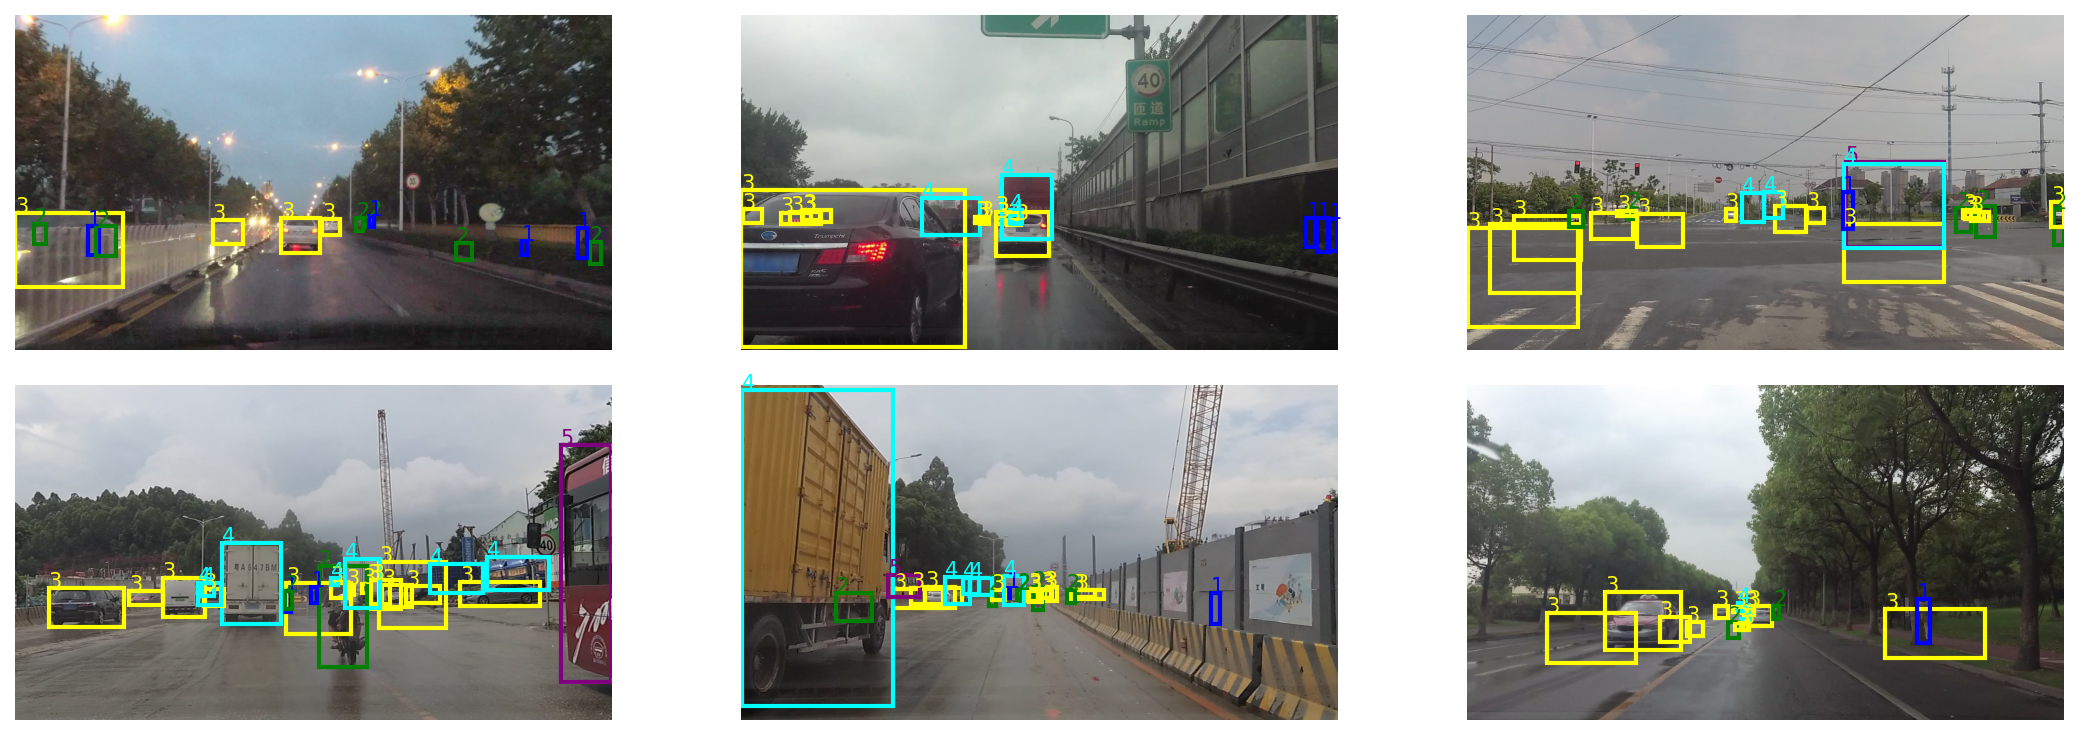

In [508]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5),dpi=150)
for idx, ax in zip(idxs, axes.flatten()):
    img, target = dataset_val[idx]
    img = img.detach().numpy()
    img = np.moveaxis(img, 0, 2)
    ax.imshow(img)
    ax.axis('off')
    
    image_id = target['image_id'].item()
    preds = val_dict[image_id]
    print (image_id, "total preds", len(preds))
    for t in preds:
        bbox = t['bbox']
        score = t['score']
        label = t['category_id']
        c = colors[label]
        if t['score'] > 0.3:
            ax.add_patch(Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
                                   fill=False, lw=2, edgecolor=c))
            #ax.text(bbox[0],bbox[1],f"{label},{score:.2f}")
            ax.text(bbox[0],bbox[1],f"{label}",color=c)    

            print (f"label:{label},{categories[label]},confidence: {score:.2f}")
        
plt.tight_layout()
plt.show()

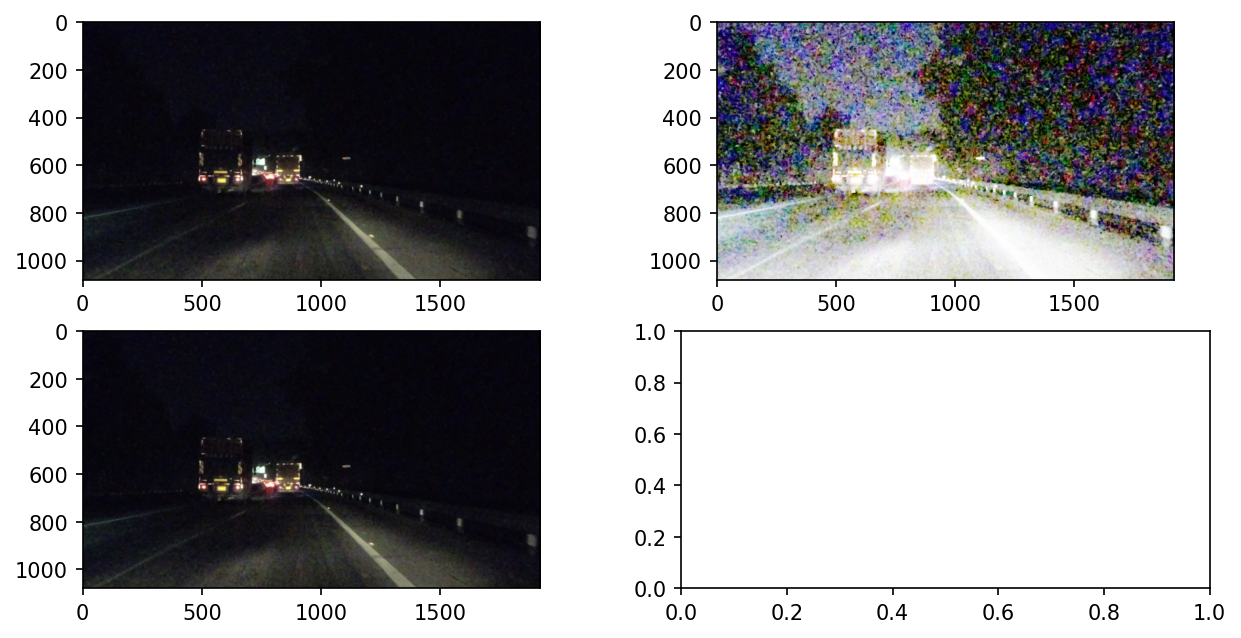

In [475]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5),dpi=150)
pil = Image.fromarray(np.uint8(255*img))
plt.subplot(2,2,1)
plt.imshow(pil)
plt.subplot(2,2,2)
plt.imshow(equalize(pil,10))
plt.subplot(2,2,3)
plt.imshow(auto_contrast(pil,4))


## search for rarer classes

In [234]:
from tqdm import tqdm
label_stats = defaultdict(set)
image_id_labels = {}
ts = train_sets[0]
L = len(ts)
for i in tqdm(range(L)):
    target = ts._load_target(i)
    image_id = target['image_id'].item()
    image_id_labels[image_id] = target['labels'].tolist()
    for idx, b in enumerate(target['labels'].tolist()):
        label_stats[b].add(image_id)
        

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4470/4470 [00:17<00:00, 256.81it/s]


In [245]:
lowest = set()
for i in [1,2,6]:
    lowest = lowest.union(label_stats[i])
print("total 1,2,6 ids", len(lowest))

total 1,2,6 ids 3249


In [274]:
statss = {}
for image_id in lowest:
    n= { 1:0, 2:0 , 6:0}
    for k in image_id_labels[image_id]:
        if k in n:
            n[k] +=1
#     statss[image_id]  = n 
    statss[image_id]= sum(n.values())
            

In [276]:
dict(sorted(statss.items(), key=lambda item: -item[1]))

{3288: 26,
 3481: 24,
 4113: 23,
 2815: 21,
 3010: 21,
 1150: 20,
 2940: 20,
 3866: 20,
 4225: 19,
 66: 18,
 275: 18,
 3358: 18,
 3404: 18,
 1364: 17,
 1370: 17,
 343: 16,
 150: 15,
 1285: 15,
 473: 14,
 3141: 14,
 3421: 14,
 3789: 14,
 15: 13,
 446: 13,
 1142: 13,
 2641: 13,
 2789: 13,
 3114: 13,
 3326: 13,
 3818: 13,
 4437: 13,
 4485: 13,
 158: 12,
 214: 12,
 464: 12,
 490: 12,
 1554: 12,
 1575: 12,
 1744: 12,
 2148: 12,
 3038: 12,
 3542: 12,
 3861: 12,
 3889: 12,
 4175: 12,
 1: 11,
 91: 11,
 550: 11,
 611: 11,
 800: 11,
 807: 11,
 1372: 11,
 1567: 11,
 1759: 11,
 2005: 11,
 2042: 11,
 2073: 11,
 2310: 11,
 2777: 11,
 2972: 11,
 3089: 11,
 3146: 11,
 3229: 11,
 3301: 11,
 3316: 11,
 3632: 11,
 3736: 11,
 3783: 11,
 3995: 11,
 4078: 11,
 4305: 11,
 4494: 11,
 35: 10,
 119: 10,
 474: 10,
 507: 10,
 794: 10,
 968: 10,
 981: 10,
 989: 10,
 1165: 10,
 1197: 10,
 1234: 10,
 1239: 10,
 1267: 10,
 1328: 10,
 1442: 10,
 1525: 10,
 1765: 10,
 1832: 10,
 1873: 10,
 1914: 10,
 2156: 10,
 2496: 1

## test boxes

In [511]:
print("test images")
test_js = read_json("./test_image_ids.json")
v = []
for k in test_js:
    length = len(test_js[k])
    print (k,length)
    v.append(length)
print ("total ",sum(v))

test images
Task 0 2433
Task 1 3126
Task 2 2968
Task 3 1442
total  9969


In [512]:
# DIR = "/home/manoj/SSLAD_Track_3/track3B/test_model_2021-10-02_23-16-47"
# DIR = "/home/manoj/SSLAD_Track_3/track3B/test_model_2021-10-01_13-02-31/"
DIR = "/home/manoj/SSLAD_Track_3/track3B/test_model_2021-10-03_19-00-04/"
!ls $DIR

result_test_0.json  result_test_1.json	result_test_2.json  result_test_3.json


In [513]:
test = []
from pathlib import Path
for f in Path(DIR).iterdir():
    print (f)
    js = read_json(f)
    test.extend(js)
    print(len(js))

/home/manoj/SSLAD_Track_3/track3B/test_model_2021-10-03_19-00-04/result_test_2.json
34126
/home/manoj/SSLAD_Track_3/track3B/test_model_2021-10-03_19-00-04/result_test_0.json
29199
/home/manoj/SSLAD_Track_3/track3B/test_model_2021-10-03_19-00-04/result_test_3.json
16836
/home/manoj/SSLAD_Track_3/track3B/test_model_2021-10-03_19-00-04/result_test_1.json
26775


In [496]:
test_id_entry = defaultdict(list)
for ent in test:
    iid = ent['image_id']
    test_id_entry[iid].append(ent)
print("total predictions unique ids: ",len(test_id_entry))

total predictions unique ids:  9952


In [491]:
for d in real_test_datasets:
    print(len(d))

2433
3126
2968
1442


In [420]:
import os
from PIL import Image
import random
test_ids = list(test_id_entry.keys())

HT_TEST_000743_SZ_002.jpg total preds 10
label:4,Truck,confidence: 1.00
label:3,Car,confidence: 1.00
label:3,Car,confidence: 1.00
label:3,Car,confidence: 1.00
label:3,Car,confidence: 1.00
label:3,Car,confidence: 1.00
label:3,Car,confidence: 1.00
label:4,Truck,confidence: 0.63
label:4,Truck,confidence: 0.29
label:3,Car,confidence: 0.10
HT_TEST_006217_SH_010.jpg total preds 6
label:3,Car,confidence: 1.00
label:3,Car,confidence: 1.00
label:3,Car,confidence: 0.70
label:4,Truck,confidence: 0.68
label:3,Car,confidence: 0.42
label:5,Tram (Bus),confidence: 0.38
HT_TEST_004996_SH_010.jpg total preds 3
label:4,Truck,confidence: 0.90
label:3,Car,confidence: 0.84
label:4,Truck,confidence: 0.16
HT_TEST_008664_SH_031.jpg total preds 15
label:3,Car,confidence: 1.00
label:3,Car,confidence: 1.00
label:3,Car,confidence: 1.00
label:2,Cyclist,confidence: 1.00
label:3,Car,confidence: 1.00
label:4,Truck,confidence: 1.00
label:3,Car,confidence: 0.99
label:4,Truck,confidence: 0.92
label:3,Car,confidence: 0.89

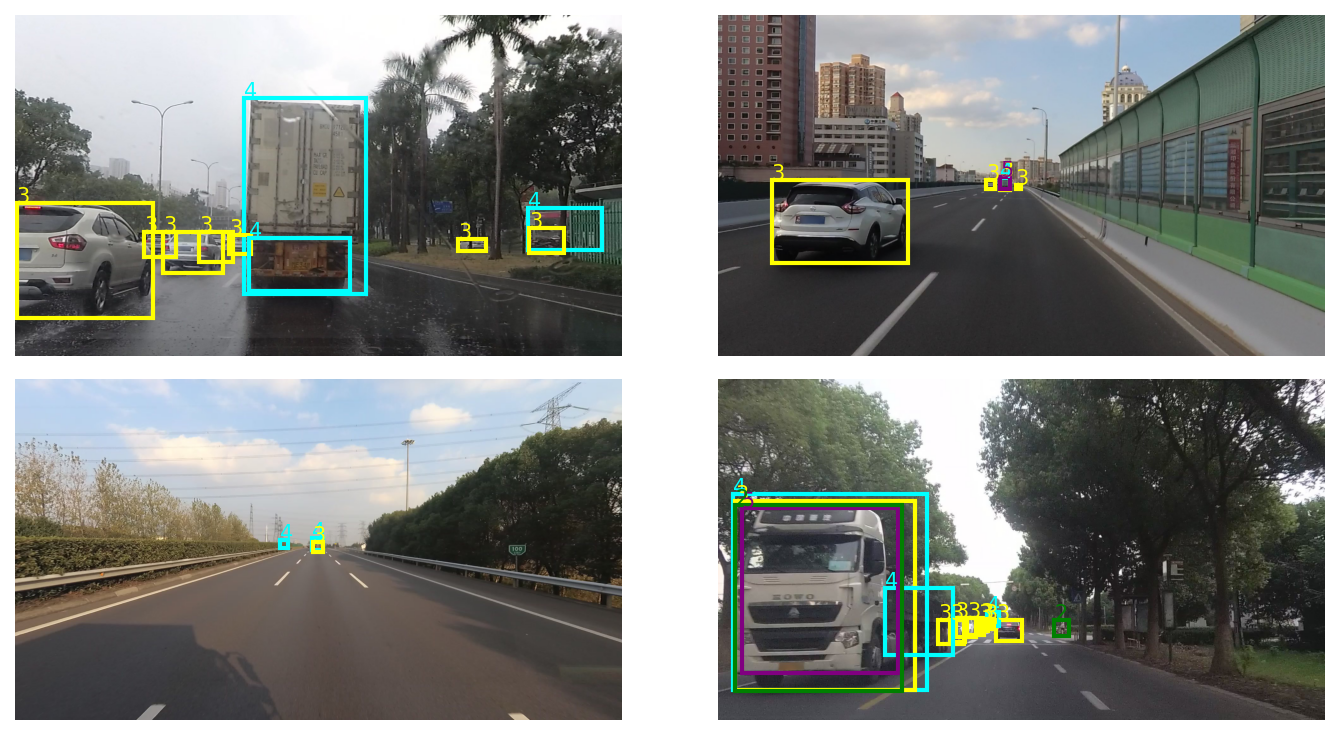

In [516]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5),dpi=150)
N = len(axes.flatten())
samples = random.choices(test_ids,k=N)
for image_id, ax in zip(samples, axes.flatten()):
    target = os.path.join(root,"test",image_id)
    img = Image.open(target).convert("RGB")
    ax.imshow(img)
    ax.axis('off')

    preds = test_id_entry[image_id]
    print (image_id, "total preds", len(preds))

    for t in preds:
        bbox = t['bbox']
        score = t['score']
        label = t['category_id']
        c = colors[label]
        ax.add_patch(Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
                               fill=False, lw=2, edgecolor=c))
        #ax.text(bbox[0],bbox[1],f"{label},{score:.2f}")
        ax.text(bbox[0],bbox[1],f"{label}",color=c)   
        
        print (f"label:{label},{categories[label]},confidence: {score:.2f}")
plt.tight_layout()
plt.show()

In [432]:
from PIL import Image, ImageEnhance, ImageOps
def equalize(img, magnitude):
    img = ImageOps.equalize(img)
    return img

In [442]:
def auto_contrast(img, magnitude):
    img = ImageOps.autocontrast(img)
    return img

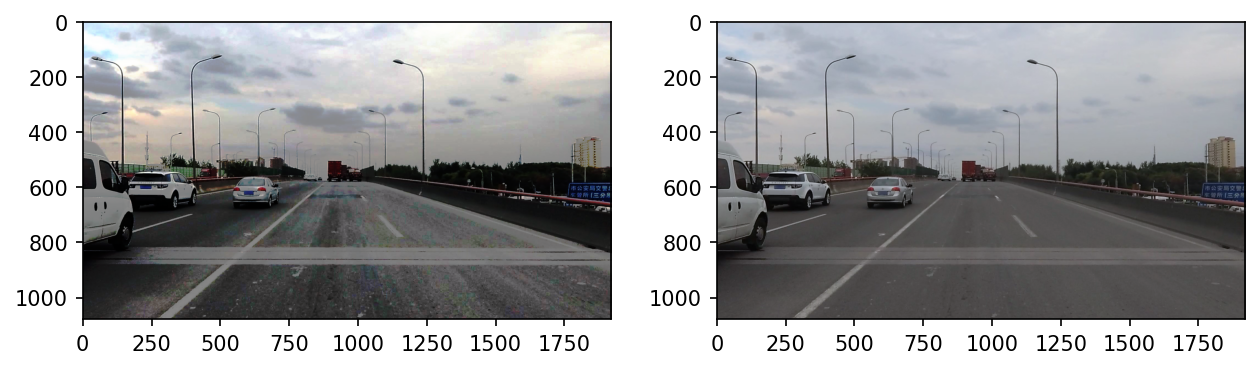

In [446]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5),dpi=150)
plt.subplot(1,2,1)
plt.imshow(equalize(img,10))
plt.subplot(1,2,2)
plt.imshow(auto_contrast(img,1))